In [3]:
# Chromaticity 
import cv2
import numpy as np

# Load the image
image = cv2.imread('shot_blue_marilyn_1964-19604.jpg')

# Resize the image
resized_image = cv2.resize(image, (600, 600))

# Convert the resized image to float32
resized_float = resized_image.astype(np.float32)

# Calculate the sum of RGB values
rgb_sum = np.sum(resized_float, axis=2)

# Normalize the RGB values
normalized_image = np.divide(resized_float, rgb_sum[:, :, np.newaxis])

# Convert the normalized image back to uint8
normalized_uint8 = (normalized_image * 255).astype(np.uint8)

# Display the original and normalized images
cv2.imshow('Original Image', resized_image)
cv2.imshow('Normalized Image', normalized_uint8)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\lordm_wnph384\AppData\Local\Temp\ipykernel_29268\2061340892.py:18: RuntimeWarning: invalid value encountered in true_divide
  normalized_image = np.divide(resized_float, rgb_sum[:, :, np.newaxis])


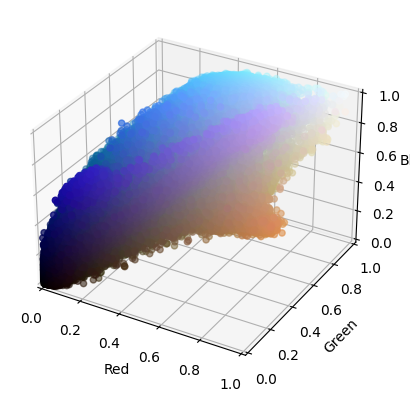

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the image
image = cv2.imread('shot_blue_marilyn_1964-19604.jpg')

# Resize the image
resized_image = cv2.resize(image, (600, 600))

# Convert the resized image to float32
resized_float = resized_image.astype(np.float32)

# Normalize the pixel values to the range [0, 1]
normalized_image = resized_float / 255.0

# Reshape the image to a 1D array
pixels = normalized_image.reshape(-1, 3)

# Create an empty 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the RGB components
r = pixels[:, 0]
g = pixels[:, 1]
b = pixels[:, 2]

# Plot the points in the RGB space
ax.scatter(r, g, b, c=pixels)

# Set axis labels
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Show the plot
plt.show()


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load the image
image = cv2.imread('shot_blue_marilyn_1964-19604.jpg')

# Resize the image
resized_image = cv2.resize(image, (600, 600))

# Define the ROI (e.g., flower region)
roi = resized_image[y1:y2, x1:x2]  # Define the coordinates (x1, y1, x2, y2) of the ROI

# Reshape the ROI to a 2D array of pixels
pixels = roi.reshape(-1, 3)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
labels = clustering.fit_predict(pixels)

# Create a colored image with the cluster labels
clustered_image = np.zeros_like(roi)
for i in range(len(pixels)):
    clustered_image[i // roi.shape[1], i % roi.shape[1]] = clustering.labels_[i]

# Display the original ROI and the clustered image
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original ROI')
axes[0].axis('off')
axes[1].imshow(clustered_image)
axes[1].set_title('Clustered Image')
axes[1].axis('off')
plt.show()


NameError: name 'y1' is not defined